## Import packages you need and data

In [1]:
## import all the packages you need 
import psycopg2
import pandas as pd
from getpass import getpass
from sqlalchemy import create_engine
import seaborn as sns
from datetime import date, datetime
from dateutil.relativedelta import relativedelta
import warnings
from matplotlib import pyplot as plt
warnings.filterwarnings('ignore')

db address (host): spinup-db001ec7.cluster-c9ukc6s0rmbg.us-east-1.rds.amazonaws.com
user: introml568
password: m7bxMRtyMqPbcxyRRGML8
db name: synthea-omop

In [2]:
# database connection parameters
hostname = input("Enter server hostname:")
username = input("Enter username: ")
password = getpass("Enter password: ")
database_name = input("Enter database name: ")

Enter server hostname: spinup-db001ec7.cluster-c9ukc6s0rmbg.us-east-1.rds.amazonaws.com
Enter username:  introml568
Enter password:  ········
Enter database name:  synthea-omop


In [3]:
# Connect using SQL Alchemy to support pandas mapping
alchemy_engine = create_engine(f"postgresql+psycopg2://{username}:{password}@{hostname}/{database_name}",  pool_recycle=3600)
db_connection = alchemy_engine.connect();

In [4]:
# Read in SQL tables through Pandas: Person and Visit 
omop_person = pd.read_sql("select * from omop.person", db_connection);
omop_visit = pd.read_sql("select * from omop.visit_occurrence", db_connection);

In [5]:
# Read in SQL tables through Pandas: Death and Concept
omop_death = pd.read_sql("select * from omop.death", db_connection);
omop_concept = pd.read_sql("select * from omop.concept", db_connection)

In [6]:
# Read in SQL tables through Pandas: Measurement
omop_measurement = pd.read_sql("select * from omop.measurement", db_connection);

In [7]:
# Read in SQL tables through Pandas: Condition
omop_condition = pd.read_sql("select * from omop.condition_occurrence", db_connection);

In [8]:
omop_visit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547144 entries, 0 to 547143
Data columns (total 17 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   visit_occurrence_id            547144 non-null  int64         
 1   person_id                      547144 non-null  int64         
 2   visit_concept_id               547144 non-null  int64         
 3   visit_start_date               547144 non-null  object        
 4   visit_start_datetime           547144 non-null  datetime64[ns]
 5   visit_end_date                 547144 non-null  object        
 6   visit_end_datetime             547144 non-null  datetime64[ns]
 7   visit_type_concept_id          547144 non-null  int64         
 8   provider_id                    547144 non-null  int64         
 9   care_site_id                   0 non-null       object        
 10  visit_source_value             547144 non-null  object        
 11  

# Short Answer Questions

In [9]:
omop_person.head(10)

,person_id,gender_concept_id,year_of_birth,month_of_birth,day_of_birth,birth_datetime,race_concept_id,ethnicity_concept_id,location_id,provider_id,care_site_id,person_source_value,gender_source_value,gender_source_concept_id,race_source_value,race_source_concept_id,ethnicity_source_value,ethnicity_source_concept_id
0,1,8532,1927,10,3,1927-10-03,8527,38003564,None,None,None,00052f4c-d75a-ea2e-d0ab-748bff41dc51,F,0,white,0,nonhispanic,0
1,2,8507,1979,6,30,1979-06-30,8527,38003564,None,None,None,0005d850-1875-59d5-a092-6f045947d656,M,0,white,0,nonhispanic,0
2,3,8532,1930,5,21,1930-05-21,8527,38003564,None,None,None,0008b1d8-c1b9-5fa2-560b-0c2fc1ce6783,F,0,white,0,nonhispanic,0
3,4,8507,1921,10,5,1921-10-05,8527,38003563,None,None,None,000a55a2-f6aa-9fa3-6961-4c6ca80a493f,M,0,white,0,hispanic,0
4,5,8507,1936,8,5,1936-08-05,8527,38003564,None,None,None,000ac697-ef2c-31da-2544-4458ebab1480,M,0,white,0,nonhispanic,0
5,6,8507,1967,11,8,1967-11-08,8527,38003564,None,None,None,00137f47-f1b9-21c8-d390-6481081c4afa,M,0,white,0,nonhispanic,0
6,7,8532,1962,8,20,1962-08-20,8527,38003564,None,None,None,0013f44b-6581-16ed-e0f5-6c37ad5365c5,F,0,white,0,nonhispanic,0
7,8,8507,2018,10,17,2018-10-17,8527,38003564,None,None,None,0017d68c-47bc-11bc-7d5f-41aa429901b1,M,0,white,0,nonhispanic,0
8,9,8507,1945,5,30,1945-05-30,8527,38003564,None,None,None,001e36c3-33ba-a2fd-13fb-c147a7babb16,M,0,white,0,nonhispanic,0
9,10,8532,1943,6,12,1943-06-12,8527,38003564,None,None,None,003c2ac8-fe3c-b1d2-4af7-e0850367c733,F,0,white,0,nonhispanic,0


In [77]:
omop_person.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11963 entries, 0 to 11962
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   person_id                    11963 non-null  int64         
 1   gender_concept_id            11963 non-null  int64         
 2   year_of_birth                11963 non-null  int64         
 3   month_of_birth               11963 non-null  int64         
 4   day_of_birth                 11963 non-null  int64         
 5   birth_datetime               11963 non-null  datetime64[ns]
 6   race_concept_id              11963 non-null  int64         
 7   ethnicity_concept_id         11963 non-null  int64         
 8   location_id                  0 non-null      object        
 9   provider_id                  0 non-null      object        
 10  care_site_id                 0 non-null      object        
 11  person_source_value          11963 non-nu

In [9]:
omop_concept.head(10)

,concept_id,concept_name,domain_id,vocabulary_id,concept_class_id,standard_concept,concept_code,valid_start_date,valid_end_date,invalid_reason
0,45756805,Pediatric Cardiology,Provider,ABMS,Physician Specialty,S,OMOP4821938,1970-01-01,2099-12-31,None
1,45756804,Pediatric Anesthesiology,Provider,ABMS,Physician Specialty,S,OMOP4821939,1970-01-01,2099-12-31,None
2,45756803,Pathology-Anatomic / Pathology-Clinical,Provider,ABMS,Physician Specialty,S,OMOP4821940,1970-01-01,2099-12-31,None
3,45756802,Pathology - Pediatric,Provider,ABMS,Physician Specialty,S,OMOP4821941,1970-01-01,2099-12-31,None
4,45756801,Pathology - Molecular Genetic,Provider,ABMS,Physician Specialty,S,OMOP4821942,1970-01-01,2099-12-31,None
5,45756800,Microbiology,Provider,ABMS,Physician Specialty,S,OMOP4821943,1970-01-01,2099-12-31,None
6,45756799,Pathology - Hematology,Provider,ABMS,Physician Specialty,S,OMOP4821944,1970-01-01,2099-12-31,None
7,45756798,Pathology - Forensic,Provider,ABMS,Physician Specialty,S,OMOP4821945,1970-01-01,2099-12-31,None
8,45756797,Pathology - Clinical,Provider,ABMS,Physician Specialty,S,OMOP4821946,1970-01-01,2099-12-31,None
9,45756796,Pathology - Chemical,Provider,ABMS,Physician Specialty,S,OMOP4821947,1970-01-01,2099-12-31,None


In [10]:
omop_concept.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824709 entries, 0 to 5824708
Data columns (total 10 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   concept_id        int64 
 1   concept_name      object
 2   domain_id         object
 3   vocabulary_id     object
 4   concept_class_id  object
 5   standard_concept  object
 6   concept_code      object
 7   valid_start_date  object
 8   valid_end_date    object
 9   invalid_reason    object
dtypes: int64(1), object(9)
memory usage: 444.4+ MB


In [ ]:
omop_measurement.head(10)

In [78]:
omop_measurement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3889982 entries, 0 to 3889981
Data columns (total 23 columns):
 #   Column                         Dtype         
---  ------                         -----         
 0   measurement_id                 int64         
 1   person_id                      int64         
 2   measurement_concept_id         int64         
 3   measurement_date               object        
 4   measurement_datetime           datetime64[ns]
 5   measurement_time               object        
 6   measurement_type_concept_id    int64         
 7   operator_concept_id            int64         
 8   value_as_number                float64       
 9   value_as_concept_id            int64         
 10  unit_concept_id                int64         
 11  range_low                      object        
 12  range_high                     object        
 13  provider_id                    int64         
 14  visit_occurrence_id            float64       
 15  visit_detail_id

# DataFrame/table merge 

In [10]:
# define a function to find a person's current age
def person_age(birthdate):
    """
    defines age based on current date
    """
    difference_in_years = relativedelta(datetime.now(), birthdate).years
    return difference_in_years

In [18]:
# p.DataFrame.merge objects with a database-style join
df = pd.merge(omop_visit, omop_person, on='person_id', how="left")

In [19]:
# add in a new variable to store the current age to the person DataFrame
df['current_age'] = df.birth_datetime.apply(person_age)

In [20]:
# add a new variable/column named visit_age
df['visit_age'] = df.apply(lambda x: relativedelta(x['visit_start_datetime'], x['birth_datetime']).years, axis=1)

In [21]:
# calculated and added a new variable visit_length_hours
df['visit_length_hours'] = df.apply(lambda x: relativedelta(x['visit_end_date'], x['visit_start_datetime']).hours, axis=1)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547144 entries, 0 to 547143
Data columns (total 37 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   visit_occurrence_id            547144 non-null  int64         
 1   person_id                      547144 non-null  int64         
 2   visit_concept_id               547144 non-null  int64         
 3   visit_start_date               547144 non-null  object        
 4   visit_start_datetime           547144 non-null  datetime64[ns]
 5   visit_end_date                 547144 non-null  object        
 6   visit_end_datetime             547144 non-null  datetime64[ns]
 7   visit_type_concept_id          547144 non-null  int64         
 8   provider_id_x                  547144 non-null  int64         
 9   care_site_id_x                 0 non-null       object        
 10  visit_source_value             547144 non-null  object        
 11  

In [16]:
# Group by 'admitted_from_concept_id' and calculate the mean age
mean_age_by_admitted = df.groupby('admitted_from_concept_id')['current_age'].mean().reset_index()
print("Mean Age by 'admitted_from_concept_id':")
print(mean_age_by_admitted)

# Group by 'discharged_to_concept_id' and calculate the mean age
mean_age_by_discharged = df.groupby('discharged_to_concept_id')['current_age'].mean().reset_index()
print("\nMean Age by 'discharged_to_concept_id':")
print(mean_age_by_discharged)

Mean Age by 'admitted_from_concept_id':
   admitted_from_concept_id  current_age
0                         0    59.276262

Mean Age by 'discharged_to_concept_id':
   discharged_to_concept_id  current_age
0                         0    59.276262


## DataFrame/table merge - II

In [23]:
# keep the menaingful columns we want
col_keep = ['person_id', 'visit_occurrence_id', 'visit_start_date', 'visit_end_date', 'visit_start_datetime','visit_end_datetime','gender_concept_id','current_age',
            'visit_age', 'gender_source_value','race_source_value', 'ethnicity_source_value', 'visit_length_hours', 'admitted_from_concept_id', 'discharged_to_concept_id']
df = df[col_keep]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547144 entries, 0 to 547143
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   person_id                 547144 non-null  int64         
 1   visit_occurrence_id       547144 non-null  int64         
 2   visit_start_date          547144 non-null  object        
 3   visit_end_date            547144 non-null  object        
 4   visit_start_datetime      547144 non-null  datetime64[ns]
 5   visit_end_datetime        547144 non-null  datetime64[ns]
 6   gender_concept_id         547144 non-null  int64         
 7   current_age               547144 non-null  int64         
 8   visit_age                 547144 non-null  int64         
 9   gender_source_value       547144 non-null  object        
 10  race_source_value         547144 non-null  object        
 11  ethnicity_source_value    547144 non-null  object        
 12  vi

In [24]:
#merging tables to get the conditions 
df_cond = pd.merge(omop_concept, omop_condition, left_on = "concept_id", right_on = "condition_concept_id", how = "inner")

In [25]:
# Long for conditions - hypertension and diabetes
person_hyp = df_cond[df_cond['concept_name'].str.lower().str.contains('hypertension')]['visit_occurrence_id']
person_db = df_cond[df_cond['concept_name'].str.lower().str.contains('diabetes')]['visit_occurrence_id']

In [26]:
# Add conditions column to the dataset df 
df['condition_hypertension']=df.visit_occurrence_id.apply(lambda x:1 if x in person_hyp else 0)
df['condition_diabetes']=df.visit_occurrence_id.apply(lambda x:1 if x in person_db else 0)

In [27]:
#merge measurements and concept data 
df_meas = pd.merge(omop_measurement, omop_concept, left_on='measurement_concept_id', right_on='concept_id', how="left")

In [28]:
# Subsetting columns in the merged DataFrame
df_meas = df_meas[['person_id', 'visit_occurrence_id', 'value_as_number', 'concept_name']]

In [29]:
# Pivot the measurements table
df_meas = df_meas.pivot_table(index='visit_occurrence_id', columns='concept_name', values='value_as_number')

In [30]:
# Merge measurements with the main DataFrame
df = pd.merge(df, df_meas, on='visit_occurrence_id', how='left')

In [68]:
df.head()

,person_id,visit_occurrence_id,visit_start_date,visit_end_date,gender_concept_id,current_age,visit_age,gender_source_value,race_source_value,ethnicity_source_value,...,Troponin I.cardiac [Mass/volume] in Serum or Plasma by High sensitivity method,Urea nitrogen [Mass/volume] in Blood,Urea nitrogen [Mass/volume] in Serum or Plasma,Walnut IgE Ab [Units/volume] in Serum,Weight difference [Mass difference] --pre dialysis - post dialysis,Weight-for-length Per age and sex,Wheat IgE Ab [Units/volume] in Serum,White Oak IgE Ab [Units/volume] in Serum,pH of Arterial blood,pH of Urine by Test strip
61,3,86,1985-05-20,1985-05-20,8532,93,54,F,white,nonhispanic,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
156,5,217,1989-04-12,1989-04-12,8507,87,52,M,white,nonhispanic,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
157,5,204,1990-04-15,1990-04-15,8507,87,53,M,white,nonhispanic,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
158,5,156,1990-04-18,1990-04-18,8507,87,53,M,white,nonhispanic,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
159,5,151,1991-04-24,1991-04-24,8507,87,54,M,white,nonhispanic,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
# Drop unwanted columns 
df = df.drop(['visit_start_datetime', 'visit_end_datetime'],axis='columns')

## Inclusion Criteria

In [32]:
# Apply inclusion and exclusion criteria
death = omop_death['person_id']
df = df[~df['person_id'].isin(death)]

#age 52-56
df = df[(df['visit_age']>=52)&(df['visit_age']<=56)]

#vsits 1-37
visit = df.groupby(['person_id'])['visit_start_date'].agg('count').reset_index()
visit = visit[(visit['visit_start_date']>=1) & (visit['visit_start_date']<=37)]
df = df[df['person_id'].isin(visit['person_id'])]

In [33]:
# Calculate visit counts after filtering
filtered_visit_counts = df.groupby(['person_id'])['visit_start_date'].agg('count').reset_index()
print("Visit counts after filtering:")
print(filtered_visit_counts)

Visit counts after filtering:
      person_id  visit_start_date
0             3                 1
1             5                 8
2             7                14
3             9                 5
4            11                 2
...         ...               ...
2757      11941                11
2758      11943                12
2759      11947                 9
2760      11960                 8
2761      11963                 5

[2762 rows x 2 columns]


In [34]:
max(filtered_visit_counts['visit_start_date'])

37

## Exclusion Criteria

In [35]:
# Identify visits with high systolic blood pressure (>140)
high_sbp = df[df['Systolic blood pressure'].astype(float) > 140]

# Extract patient IDs for visits that fall between visits 3-17 with high systolic blood pressure
ex_range = high_sbp[(high_sbp['visit_occurrence_id'] >= 3) & (high_sbp['visit_occurrence_id'] <= 17)]['person_id']

# Exclude patients seen between visits 3-17 with high systolic blood pressure
df = df[~df['person_id'].isin(ex_range)]

# Identify visits with associated measurements (those that have at least one measurement)
visits_with_measurements = df.dropna(subset=df.columns[df.columns.str.startswith('measurement - ')], how='all')

# Extract patient IDs for visits without associated measurements
excluded_patients = visits_with_measurements[~visits_with_measurements['person_id'].isin(df['person_id'])]['person_id'].unique()

# Exclude visits that do not contain any associated measurements
df = df[~df['person_id'].isin(excluded_patients)]

In [36]:
len(df)

22277

## Visualizing Descriptive Statistics 

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

bar plots/histograms

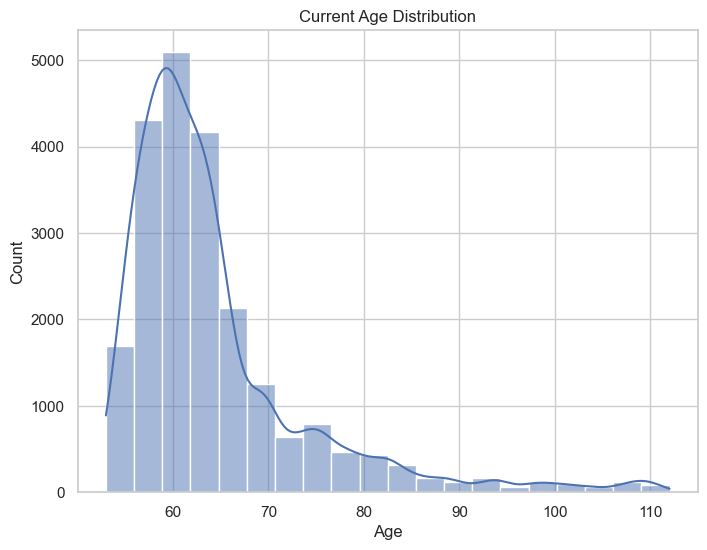

In [39]:
# Current age:
# Set the style for plots
sns.set(style="whitegrid")

# Create a figure with a single subplot for Current Age
plt.figure(figsize=(8, 6))

# Histogram for current age
sns.histplot(df['current_age'], bins=20, kde=True)
plt.title('Current Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')

# Show the plot
plt.show()

The graph shows that most of the ages for the cohort are on the left side of the graph; thus, the data is skewed towards the left. So, most of our cohort is around 60, which is very different from the original graph, where the graph seems somewhat normal and is not skewed. 

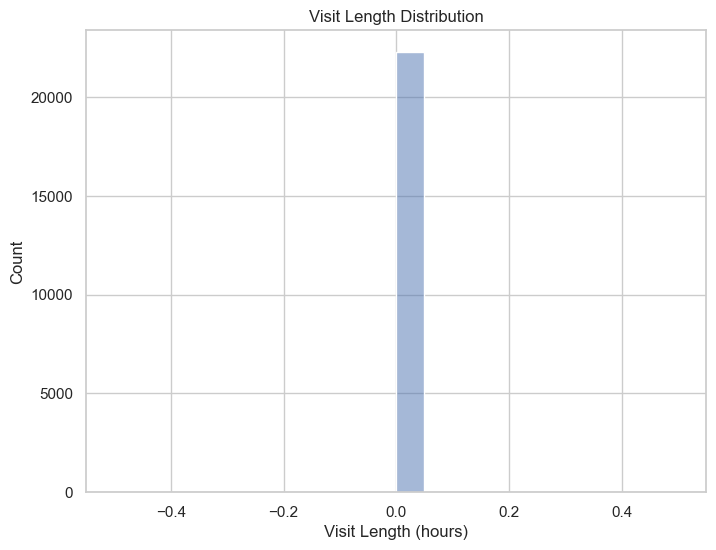

In [40]:
# Visit Lenght Time
# Set the style for plots
sns.set(style="whitegrid")

# Create a figure with a single subplot for Visit Length
plt.figure(figsize=(8, 6))

# Histogram for visit length
sns.histplot(df['visit_length_hours'], bins=20, kde=True)
plt.title('Visit Length Distribution')
plt.xlabel('Visit Length (hours)')
plt.ylabel('Count')

# Show the plot
plt.show()

This we could not that the visit as before seesm to be less then an hour. 

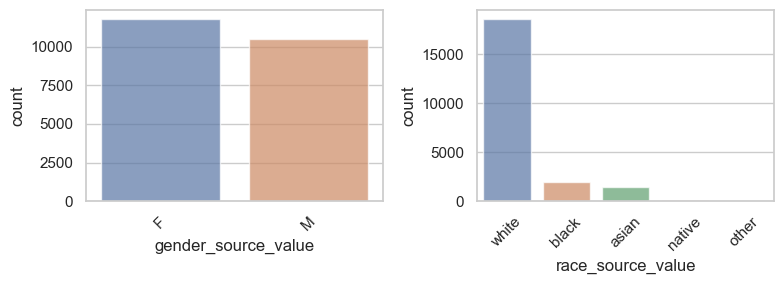

In [49]:
# select catgorical columns of interest
cat_col = ['gender_source_value', 'race_source_value']
df_cat = df[cat_col]

# create figures and plots
fig, axes = plt.subplots(1, 2, figsize=(8, 3))

for i, ax in enumerate(fig.axes):
    if i < len(df_cat.columns):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        sns.countplot(x=df_cat.columns[i], alpha=0.7, data=df_cat, ax=ax)

fig.tight_layout()

Thus, for our cohort, we can note that most of them are around 60 years of age, have a visit length of less than an hour, and are most likely to be females and white. From the gender and race graph, we can note that more females are in our cohort then males. Furthermore, for race, there are many more white than Asian, black, or native American patients in the cohort.

box plots

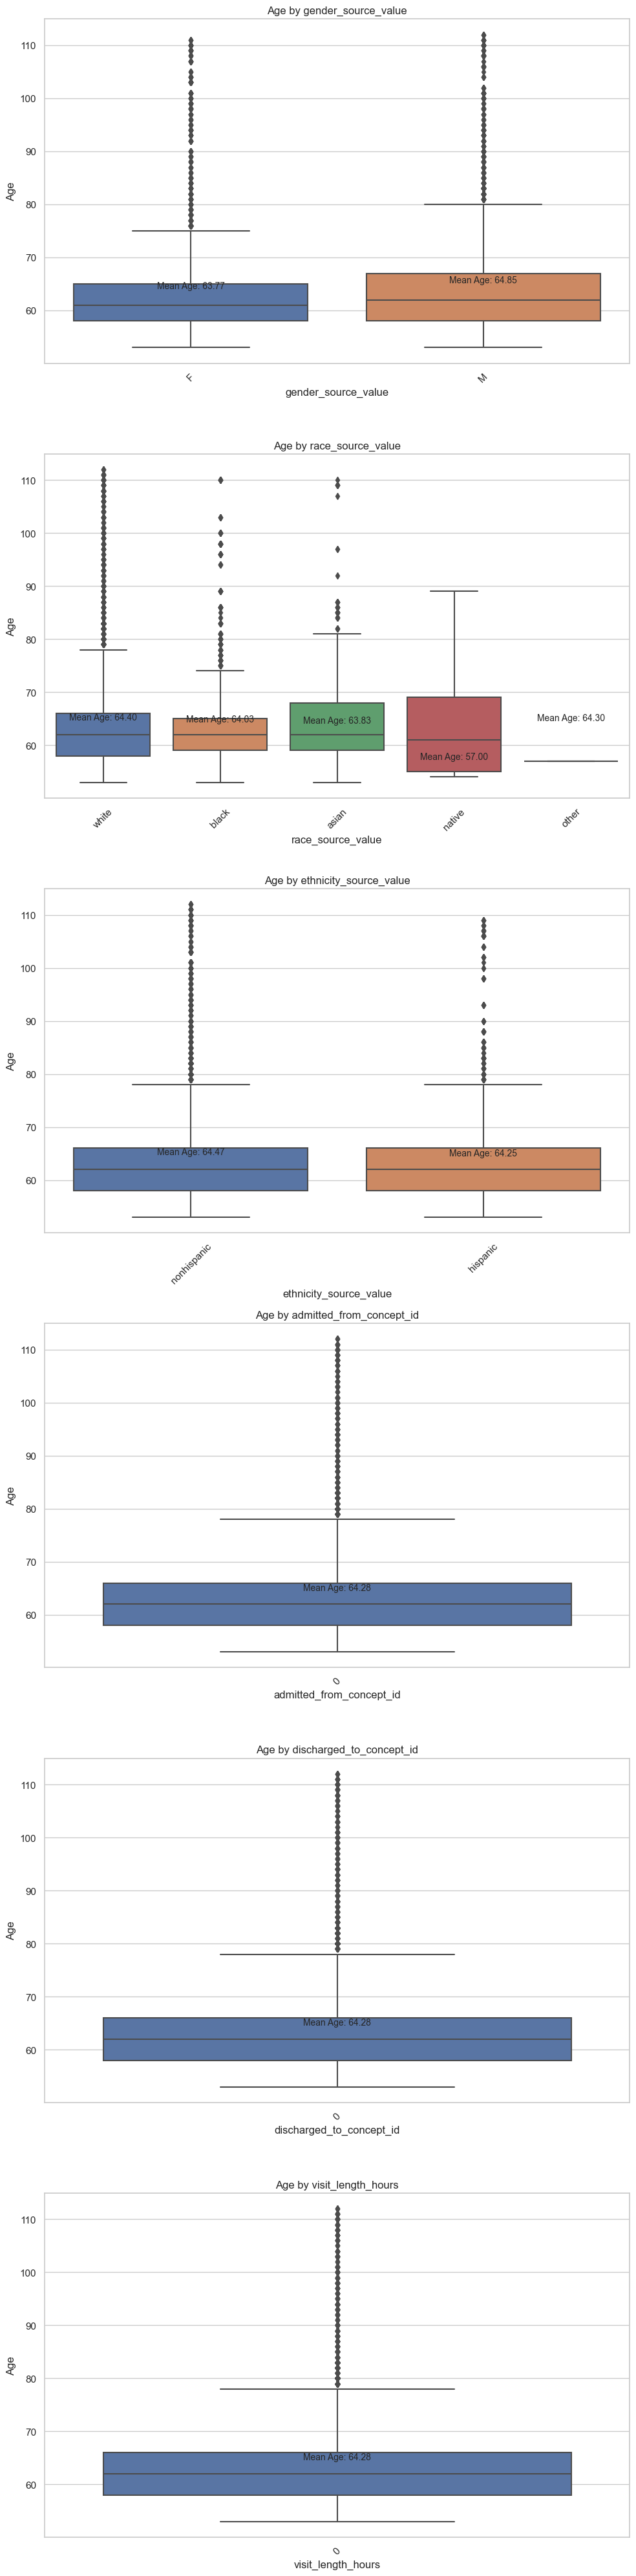

In [57]:
# Set the style for plots
sns.set(style="whitegrid")

# Create a figure with subplots for box plots
fig, axes = plt.subplots(nrows=6, ncols=1, figsize=(10, 40))

# Select categorical columns of interest
cat_cols = ['gender_source_value', 'race_source_value', 'ethnicity_source_value', 
            'admitted_from_concept_id', 'discharged_to_concept_id', 'visit_length_hours']

# Plot age across categories (box plots) and add mean values
for i, cat in enumerate(cat_cols):
    sns.boxplot(x=cat, y='current_age', data=df, ax=axes[i])
    axes[i].set_title(f'Age by {cat}')
    axes[i].set_xlabel(f'{cat}')
    axes[i].set_ylabel('Age')
    axes[i].tick_params(axis='x', rotation=45)
    
    # Add mean values as text on the plot
    mean_age = df.groupby(cat)['current_age'].mean().reset_index()
    for j, val in enumerate(mean_age['current_age']):
        axes[i].text(j, val, f'Mean Age: {val:.2f}', ha='center', va='bottom', fontsize=10)

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()


By looking at the box plots we could note that our cohort has alot of ouliers for all of the varaibles, as well we can note that the mean for Male, white and nonhispanic is higher then for other categories. And the mean for admition and dischareg is 64, as well as for the visit number is also 64 age.

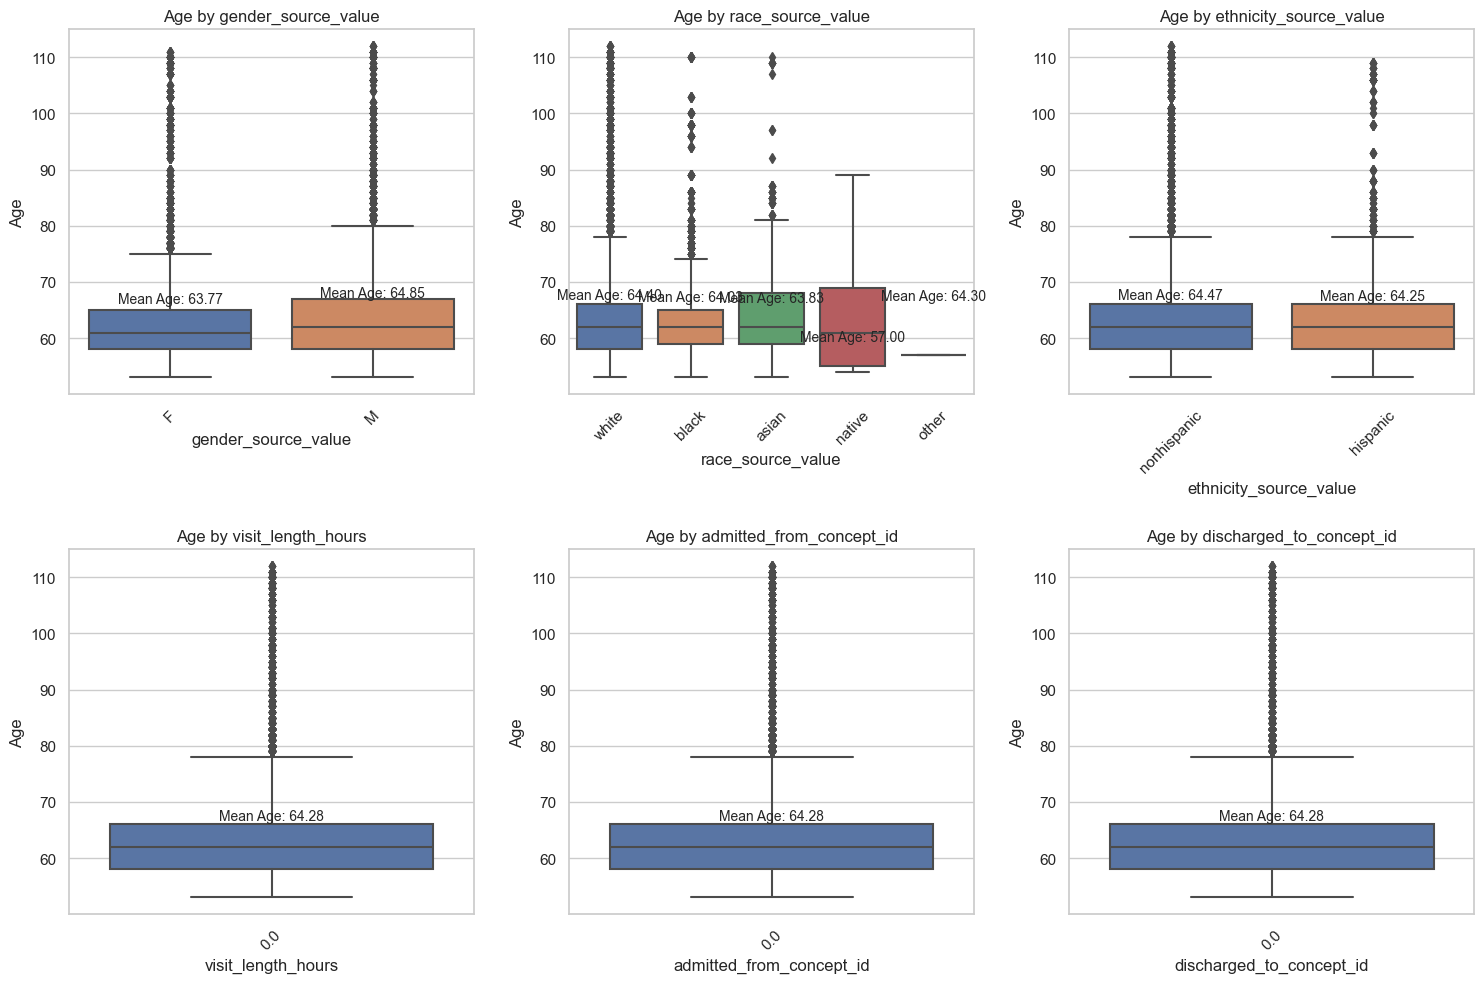

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for plots
sns.set(style="whitegrid")

# Create a figure with subplots for box plots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))  # Increase the figure size

# Select categorical columns of interest
cat_cols = ['gender_source_value', 'race_source_value', 'ethnicity_source_value', 'visit_length_hours', 'admitted_from_concept_id', 'discharged_to_concept_id']

# Loop through each category and create box plots with means
for i, cat in enumerate(cat_cols):
    ax = sns.boxplot(x=cat, y='current_age', data=df, ax=axes[i//3, i%3])
    ax.set_title(f'Age by {cat}')
    ax.set_xlabel(f'{cat}')
    ax.set_ylabel('Age')
    ax.tick_params(axis='x', rotation=45)
    
    # Calculate mean age for each category
    mean_age = df.groupby(cat)['current_age'].mean().reset_index()
    
    # Add mean values as text on the plot (adjusted position)
    for j, val in enumerate(mean_age['current_age']):
        ax.text(j, val + 2, f'Mean Age: {val:.2f}', ha='center', va='bottom', fontsize=10)  # Increase the y-coordinate

# Adjust layout to add more space between subplots
plt.tight_layout(h_pad=2.0)  # Increase the vertical spacing

# Show plots
plt.show()



## Save Data 

In [58]:
# Convert all numbers to numeric data type (float)
numeric_columns = df.select_dtypes(include=['number'])
df[numeric_columns.columns] = numeric_columns.astype(float)

# Convert all characters to character data type (str)
character_columns = df.select_dtypes(include=['object'])
df[character_columns.columns] = character_columns.astype(str)

# Save the DataFrame to a CSV file with the specified data types
df.to_csv('dat.csv', index=False)